In [1]:
import sys
sys.path.insert(0, './src')
from matplotlib import pyplot as plt

from multiply_connected_pipe import Boundary, MultiplyConnectedPipeFromBoundaries

from curve import *
from pipe import *
from pipe.smooth_pipe import SmoothPipe
from utils import *

from matplotlib.path import Path


In [2]:
p1 = pt(-8,1)
p2 = pt(8,1)
p3 = pt(8,-1)
p4 = pt(-8,-1)

pts = [p1, p2, p3, p4]

l1 = Line
l2 = Cap
l3 = Line
l4 = Cap

ls = [l1, l2, l3, l4]

In [3]:
pipe = SmoothPipe(pts, ls)
pipe.build_geometry()
b1 = Boundary(pipe.curves)

In [4]:
c1 = Circle(.2, pt(1,0.5))
c2 = Circle(.2, pt(-3,0))
c3 = Circle(.2, pt(3,-0.5))

# c = [c1]
c = [c1, c2, c3]
[ci.build() for ci in c];

In [5]:
bs = [Boundary([ci]) for ci in c]
bs.append(b1)

In [6]:
the_pipe = MultiplyConnectedPipeFromBoundaries(bs)

In [7]:
the_pipe.build(tol=1e-13)

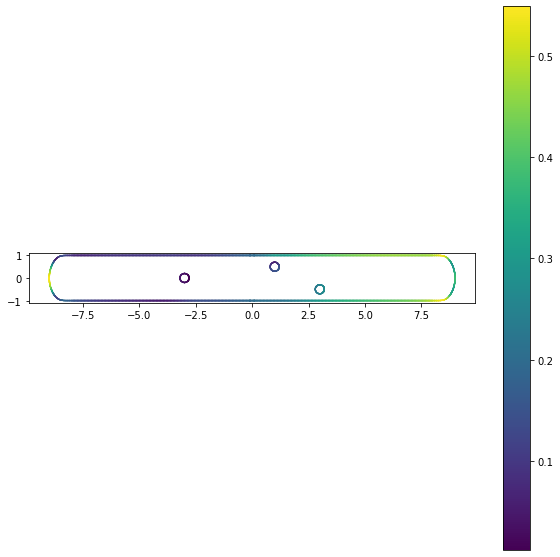

In [8]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,10))
fig.colorbar(ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0])))
# fig.colorbar(ax.scatter(x, y,s=0.1,c=-u.imag))
ax.set_aspect('equal')
# ax.scatter(xs, ys,s=1,c='r')

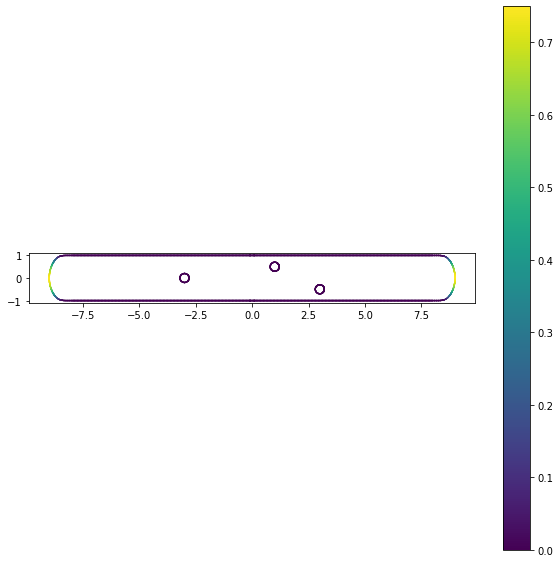

In [9]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,10))
fig.colorbar(ax.scatter(x, y,s=0.1,c=-the_pipe.boundary_value(0).imag))
# fig.colorbar(ax.scatter(x, y,s=0.1,c=-u.imag))
ax.set_aspect('equal')
# ax.scatter(xs, ys,s=1,c='r')

In [10]:
xs = np.linspace(-8,8,500)
ys = np.linspace(-1,1,100)
xs,ys = np.meshgrid(xs,ys)

xs = xs
ys = ys

In [11]:
m = Path(np.array([p1,p2,p3,p4])).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
for ci in c:
    m &= ~Path(np.array([ci.t.real,ci.t.imag]).T).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
m = m.reshape(xs.shape)

In [12]:
U = the_pipe.velocity(xs[m].ravel(),ys[m].ravel(),the_pipe.omegas[0])

In [13]:
u = np.zeros_like(xs)
v = np.zeros_like(xs)

In [14]:
u[m] = U[:,0]
v[m] = U[:,1]
u[~m] = np.nan
v[~m] = np.nan

Text(0.5, 0.98, 'color=|velocity|')

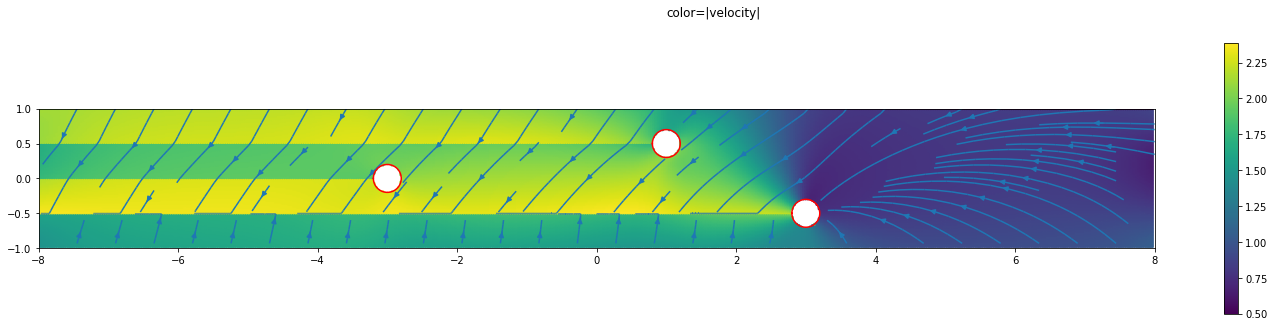

In [15]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(25,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
ax.set_aspect('equal')

ax.streamplot(xs,ys,u,v)

fig.colorbar(ax.scatter(xs, ys,s=4,c=np.sqrt(u**2+v**2)))

for ci in c:
    ax.plot(ci.t.real,ci.t.imag,c='r')
fig.suptitle('color=|velocity|')

In [16]:
from scipy.special import roots_legendre

In [17]:
xs = np.arange(-10,10,1)
ys, dys = roots_legendre(16)
xs,ys = np.meshgrid(xs,ys)
xs=xs.flatten()
ys=ys.flatten()
xs.shape, ys.shape

((320,), (320,))

In [18]:
u = the_pipe.velocity(xs,ys,the_pipe.omegas[0]).reshape(-1,16,2)

In [19]:
u.shape

(20, 16, 2)

In [20]:
np.sum(u[:,:,0]*dys[np.newaxis,:],axis=1)

array([ 0.52869832,  0.3926329 , -0.21654562, -0.48808087, -0.13017537,
        0.5121351 , -2.50459552, -2.08704637, -2.0482844 , -2.3161052 ,
       -2.66206515, -2.55321283, -2.11162552, -1.9374128 , -1.93867156,
       -2.14559831, -2.0403183 , -1.76778919, -1.72391749, -1.93876494])